## Volatility and Daily log return

### Volatility
In finance, the standard deviation (of a time series) is usually called volatility.

If the time window is not explicitly mentioned, 
<br/>
then it is usually one year (for example, with derivatives) or one day (for example, when managing daily risk).

#### Task: In each month between 2011 and 2013 how much was the volatility of the daily average temperature of Budapest ?

###### Answer

_Download data_

Download the daily average temperatures of Budapest from 1901 to the current year.
1. Please go to https://www.met.hu/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/Budapest/adatok/napi_adatok/index.php
2. On the right, below "Adatok", click on "Adatok letöltése". This will download the file "eghajlati_adatsor_1901-2019+Budapest.zip".
3. From this zip extract the file `BP_d.txt`, and move this file to the `data` subfolder of directory of the current notebook. 
4. Observe that the daily average temperature (Celsius) values are in the column "d_ta".

_Read and format the data_

In [1]:
import pandas as pd
from os import path

df = pd.read_csv(path.join('data', 'BP_d.txt'), sep=';')[['#datum', 'd_ta']]
df.rename(columns={'#datum': 'Date', 'd_ta': 'Avg temp'}, inplace=True)
df.index = pd.to_datetime(df['Date'])
df['Year'] = [date.year for date in df.index]
df['Month'] = [date.month for date in df.index]
df.drop(columns=['Date'], inplace=True)
df.head()

,Avg temp,Year,Month
Date,,,
1901-01-01,-5.7,1901,1
1901-01-02,-9.3,1901,1
1901-01-03,-9.1,1901,1
1901-01-04,-11.0,1901,1
1901-01-05,-11.1,1901,1


_Calculate the volatility for each month_

In [2]:
import numpy as np

FIRST_YEAR = 1901

years_months = np.unique(12 * (df.Year - FIRST_YEAR) + df.Month - 1)

year_month_vol = {ym: {'vol': np.std(df[(df.Year - FIRST_YEAR == ym // 12) & 
                                        (df.Month - 1 == ym % 12)]['Avg temp']),
                       'year': ym // 12 + FIRST_YEAR, 
                       'month': ym % 12 + 1}
                  for ym in years_months}

_Plot results_

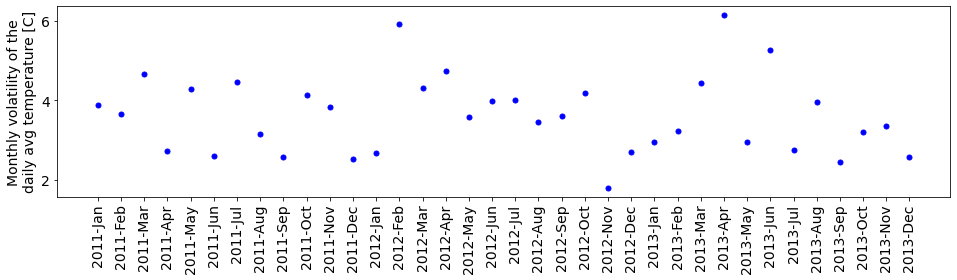

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import calendar


PLOT_START_YEAR, PLOT_END_YEAR = (2011, 2013)

vol = {ym: year_month_vol[ym] for ym in year_month_vol.keys() 
           if PLOT_START_YEAR <= year_month_vol[ym]['year'] <= PLOT_END_YEAR}

my_fontsize = 14
yticks = [2, 4, 6]
xticks = np.arange( ( PLOT_START_YEAR - FIRST_YEAR ) * 12, ( PLOT_END_YEAR - FIRST_YEAR ) * 12 + 12 )
xticks_str = [str(year_month // 12 + FIRST_YEAR) + '-' + str(calendar.month_abbr[year_month % 12 + 1]) 
              for year_month in xticks]

plt.plot(sorted(vol.keys()), [vol[k]['vol'] for k in sorted(vol.keys())], 'b.', ms=10)
plt.ylabel("Monthly volatility of the\ndaily avg temperature [C]", fontsize=my_fontsize)
plt.yticks(yticks, [str(_) for _ in yticks], fontsize=my_fontsize)
plt.xticks(xticks, xticks_str, rotation='vertical', fontsize=my_fontsize)

fig = plt.gcf()
fig.set_size_inches([16, 3.5])
plt.show()

### Daily log return

At the closing of day $\,t\,$ the value of one unit of an asset is $\,S\,(\,t\,)\,$. 

This asset can be, for example, oil, the S&P500 stock index, or T-Bills.

For one unit of this asset, at the end of day $\,t\,$
the daily logarithmic return is $\,\displaystyle{R\left(\,t\,\right):=\ln\left(\frac{S\,(\,t\,)}{S\,(\,t-1\,)}\,\right)}\,$

#### Task: What were the highest and lowest daily log return values of the S&P 500 index ?

###### Answer

_Download the data_

Download historical values of the SP500 index
1. Go to https://finance.yahoo.com/quote/%5EGSPC/history
2. For the Time period, select "Max".
3. On the right side, click "Apply", and below that "Download".
4. Save the downloaded file as `^GSPC.csv` in the `data` subfolder of the directory of the current notebook.

_Analyze the data_

In [4]:
import pandas as pd
import numpy as np
import os

# Read and format the data
df = pd.read_csv(os.path.join('data', '^GSPC.csv'))[['Date', 'Close']]
df.index = pd.to_datetime(df['Date'])
df.drop(columns=['Date'], inplace=True)

# Calculate daily log return
df['R'] = np.log(df.Close) - np.log(df.Close.shift())
df.dropna(inplace=True)

# Show highest and lowest daily log returns. For formatted printing a DataFrame is applied.
pd.DataFrame(data=df.R.sort_values(ascending=False))

,R
Date,
1933-03-15,0.153661
1929-10-30,0.118055
1931-10-06,0.116522
1939-09-05,0.112064
1932-09-21,0.111640
...,...
1935-04-16,-0.104995
1929-10-29,-0.107121
2020-03-16,-0.127652


### Volatility of the daily log return
The volatility is the standard deviation.

In finance it is usually calculated either for one year or for one day.

#### Task: How much was the volatility of the daily log return of the S&P500 index in each year so far ?

###### Answer
Use the `df['R']` column calculated for the previous answer.

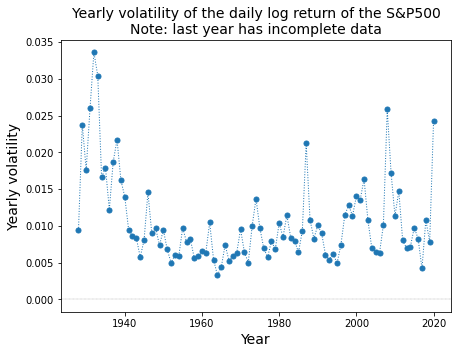

,Volatility
Year,
1932,0.033588
1933,0.030416
1931,0.025983
2008,0.025840
2020,0.024244
...,...
1952,0.004978
1995,0.004913
1965,0.004374


In [5]:
import matplotlib.pyplot as plt 

# Calculate yearly std.dev of the daily log return (R)
df['Year'] = [date.year for date in df.index]
sigma = df.R.groupby(df.Year).agg(np.std)

# Plot result
fontsize = 14
fig, axes = plt.subplots(figsize=(7,5))
plt.plot(sigma, markersize=10, marker='.', linestyle=':', linewidth=1)
plt.title("Yearly volatility of the daily log return of the S&P500\nNote: last year has incomplete data", fontsize=fontsize)
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Yearly volatility', fontsize=fontsize)
plt.axhline(0, c='k', ls=':', lw=.3)
plt.show()

# Use DataFrame for the formatted printing of the sorted data
pd.DataFrame(data=sigma.rename('Volatility', inplace=True).sort_values(ascending=False))